**prediction model for profit of 50_startups data**

In [ ]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## import dataset
from google.colab import files
uploaded=files.upload()


Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# Renaming the Columns
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTG'},axis=1)
data1

,RDS,ADMS,MKTG,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data1[data1.duplicated()]            ## No duplicates

,RDS,ADMS,MKTG,State,Profit


In [ ]:
data1.describe()

,RDS,ADMS,MKTG,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Correlation Analysis

In [ ]:
data1.corr()

,RDS,ADMS,MKTG,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTG,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


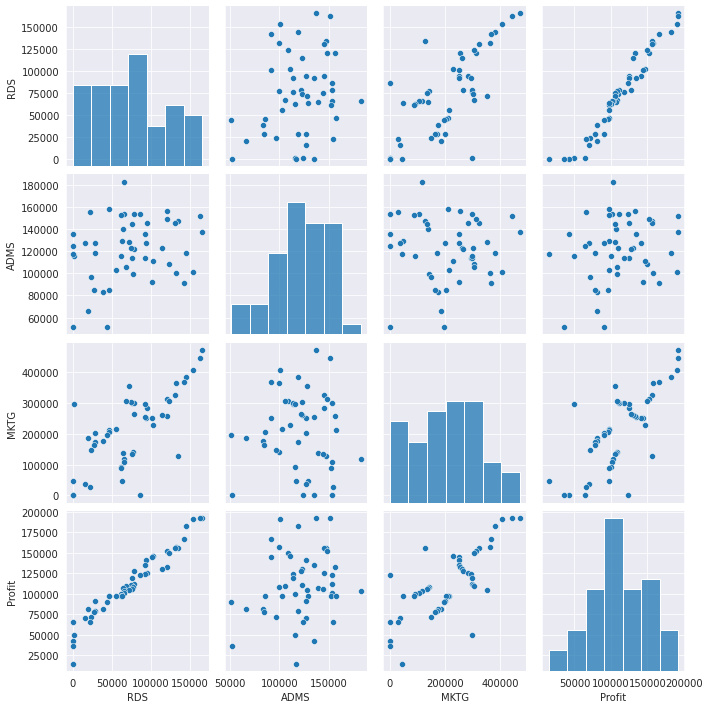

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1);

Preparing a model

In [ ]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+ADMS+MKTG',data=data1).fit()

In [ ]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTG             0.027228
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTG          1.655077
dtype: float64 
 Intercept    0.00000
RDS          0.00000
ADMS         0.60176
MKTG         0.10472
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
## Build simple linear regression and multi linear regression for insignificant variables 'ADMS' & 'MKTG'

In [ ]:
slr_A=smf.ols('Profit~ADMS',data = data1).fit()  
#t and p-Values
print(slr_A.tvalues, '\n',slr_A.pvalues) 

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [ ]:
slr_M=smf.ols('Profit~MKTG',data = data1).fit()  
#t and p-Values
print(slr_M.tvalues, '\n',slr_M.pvalues)

Intercept    7.808356
MKTG         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTG         4.381073e-10
dtype: float64


In [ ]:
mlr_AM=smf.ols('Profit~ADMS+MKTG',data = data1).fit()  
#t and p-Values
print(mlr_AM.tvalues, '\n',mlr_AM.pvalues) 

Intercept    1.142741
ADMS         2.467779
MKTG         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADMS         1.729198e-02
MKTG         9.727245e-11
dtype: float64


Calculating VIF

In [ ]:
rsq_R=smf.ols('RDS~ADMS+MKTG',data=data1).fit().rsquared
vif_R=1/(1-rsq_R)

rsq_A=smf.ols('ADMS~RDS+MKTG',data=data1).fit().rsquared
vif_A=1/(1-rsq_A)

rsq_M=smf.ols('MKTG~ADMS+RDS',data=data1).fit().rsquared
vif_M=1/(1-rsq_M)

# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADMS','MKTG'],'VIF':[vif_R,vif_A,vif_M]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTG,2.326773


In [ ]:
## None of the VIF>20, No collinearity, consider all variables in Regression Equation

Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

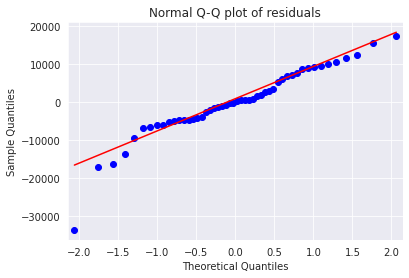

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-30000))  

[array([49])]

Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()

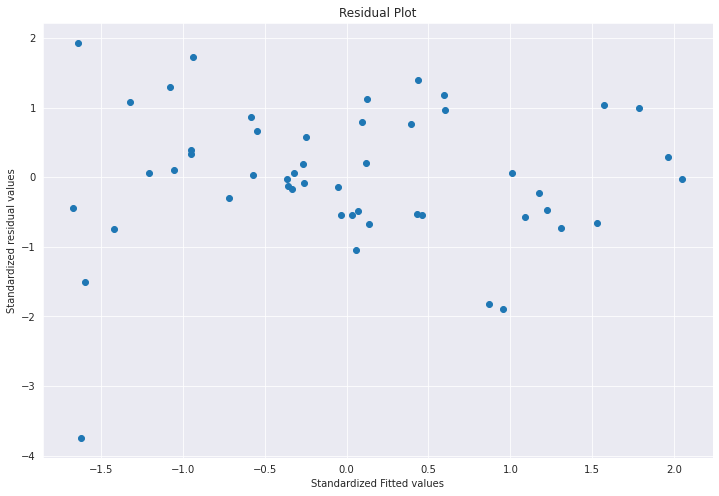

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

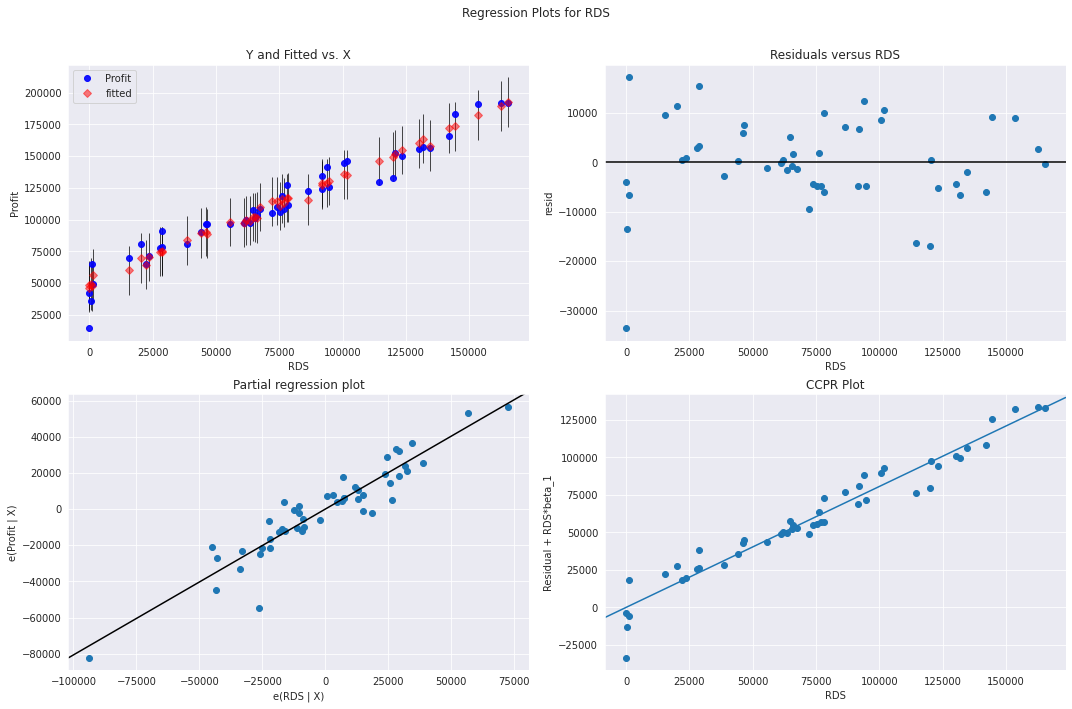

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

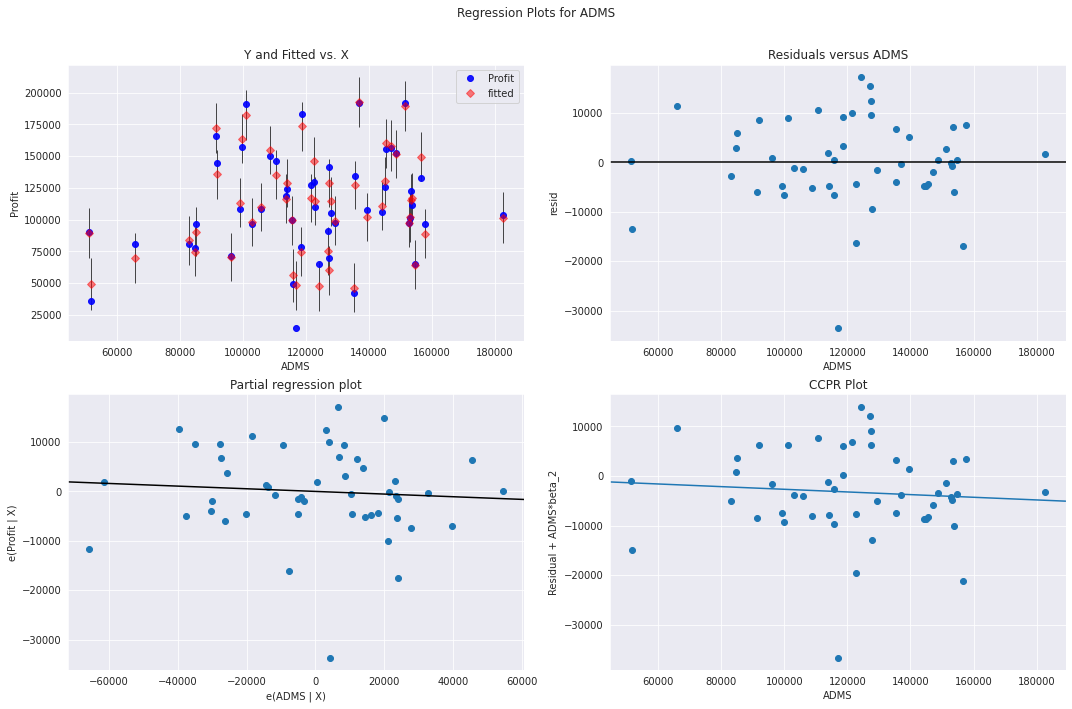

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

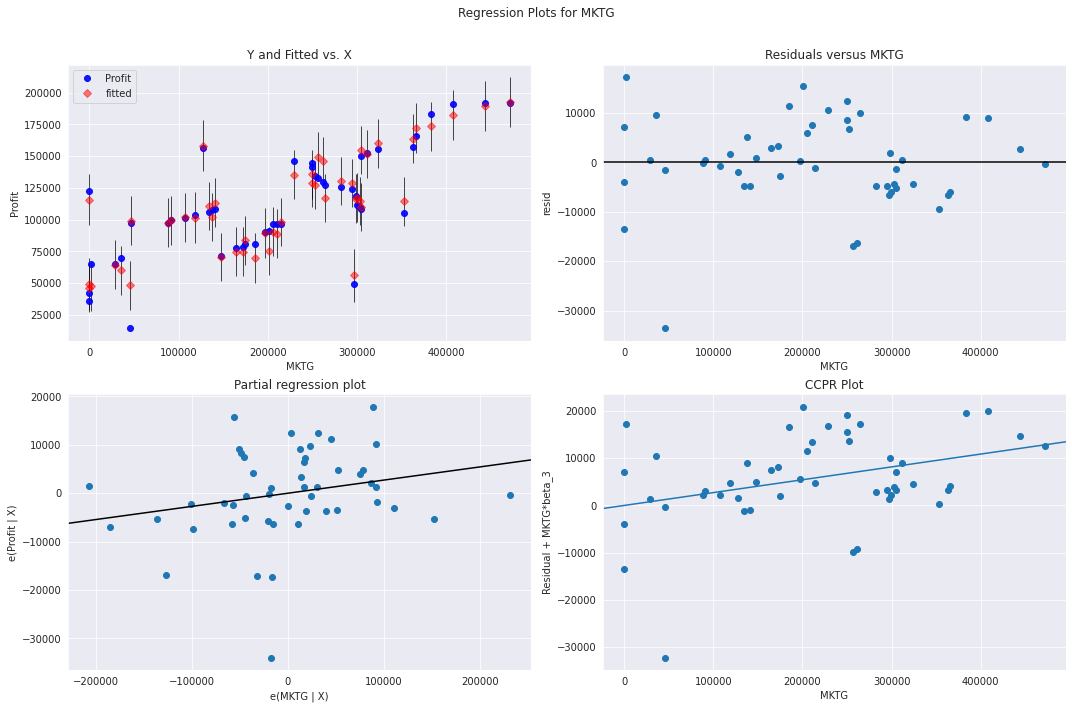

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "MKTG", fig=fig)
plt.show()

Model Deletion Diagnostics (Detecting Influencers/Outliers)

Cook’s Distance and Leverage Value

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

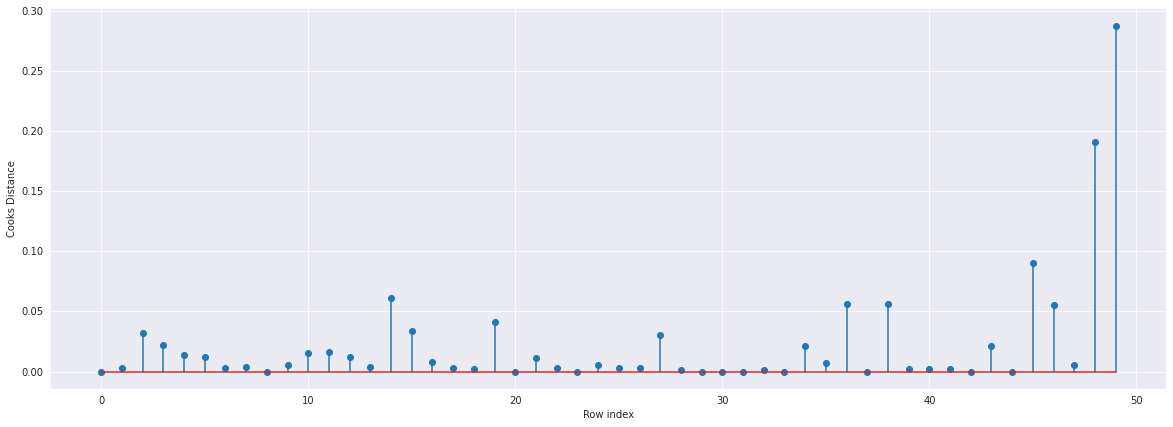

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [ ]:
data1.shape

(50, 5)

In [ ]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

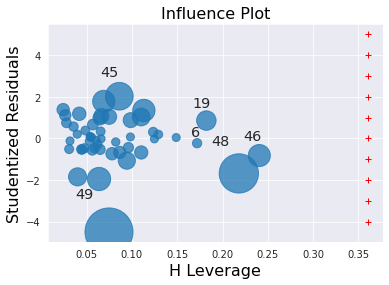

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-4,6)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [ ]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTG,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data1.drop(data1.index[[49]],axis=0).reset_index()
data2

,index,RDS,ADMS,MKTG,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#Drop the original index
data2=data2.drop(['index'],axis=1)

In [ ]:
data2

,RDS,ADMS,MKTG,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Final Model

In [ ]:
if np.max(c)>0.5:
  model=smf.ols('Profit~RDS+ADMS+MKTG',data=data2).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  data2
elif np.max(c)<1:
  final_model=smf.ols('Profit~RDS+ADMS+MKTG',data=data2).fit()
  final_model.rsquared,final_model.aic
  print('Model accuracy is improved to:',final_model.rsquared)

Model accuracy is improved to: 0.9613162435129848


In [ ]:
data2

,RDS,ADMS,MKTG,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#Check the accuracy of the model
final_model= smf.ols('Profit~RDS+ADMS+MKTG',data = data2).fit()

In [ ]:
(final_model.rsquared,final_model.aic)

(0.9613162435129848, 1020.5652974526366)

Model Predictions

In [ ]:
predict_y=final_model.predict(data2)
predict_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [ ]:
d2={'Prepared_Models':['Model','Final Model'],'R_Squared':[model.rsquared,final_model.rsquared]}
pd.DataFrame(d2)

,Prepared_Models,R_Squared
0,Model,0.950746
1,Final Model,0.961316


**Prepare a prediction model for predicting price**

In [ ]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
toyo = pd.read_csv('ToyotaCorolla.csv', encoding='latin')
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


EDA

In [ ]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
# Selecting columns
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
# Renaming the Columns
toyo3=toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#check for missing values
toyo3.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [ ]:
toyo3[toyo3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyo4=toyo3.drop_duplicates().reset_index(drop=True)
toyo4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyo4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


Correlation Analysis

In [ ]:
toyo4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


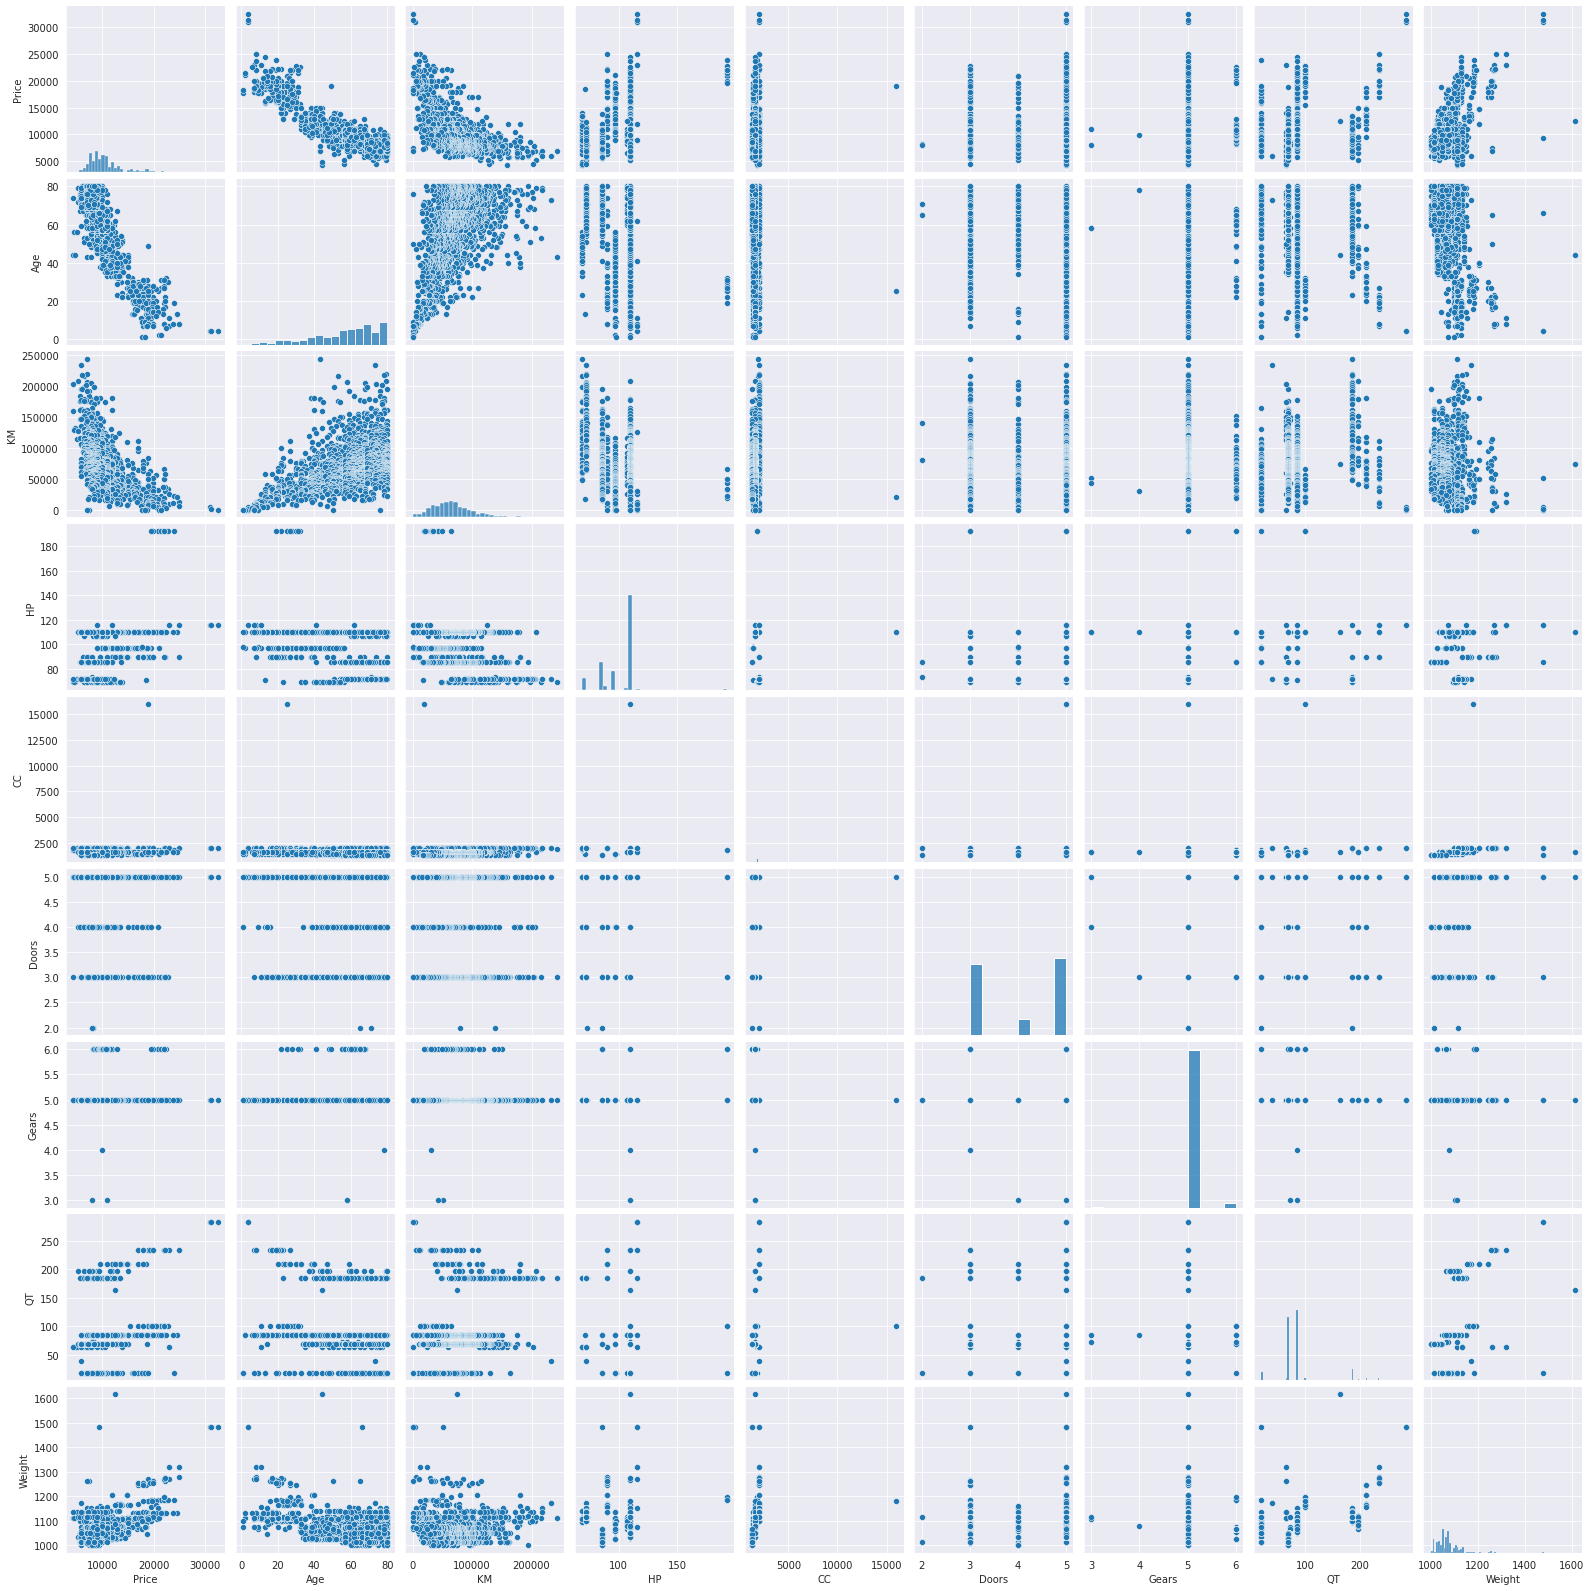

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyo4)

Preparing a model

In [ ]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit()

In [ ]:
#Coefficients
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

In [ ]:
## Build SLR and MLR models for 'CC' and 'Doors' and find their t and p values

In [ ]:
slr_C=smf.ols('Price~CC',data = toyo4).fit()  
#t and p-Values
print(slr_C.tvalues, '\n',slr_C.pvalues) 

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [ ]:
slr_D=smf.ols('Price~Doors',data = toyo4).fit()  
#t and p-Values
print(slr_D.tvalues, '\n',slr_D.pvalues) 

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [ ]:
mlr_CD=smf.ols('Price~CC+Doors',data = toyo4).fit()  
#t and p-Values
print(mlr_CD.tvalues, '\n',mlr_CD.pvalues) 

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


In [ ]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_dr = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_dr = 1/(1-rsq_dr)

rsq_gr = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo4).fit().rsquared
vif_gr = 1/(1-rsq_gr)

rsq_qt = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo4).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo4).fit().rsquared
vif_wt = 1/(1-rsq_wt)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [ ]:
## None of the VIF>20, No collinearity, consider all variables in Regression Equation

Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

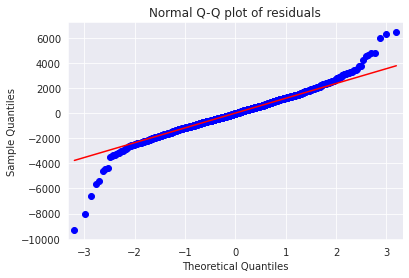

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [ ]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()

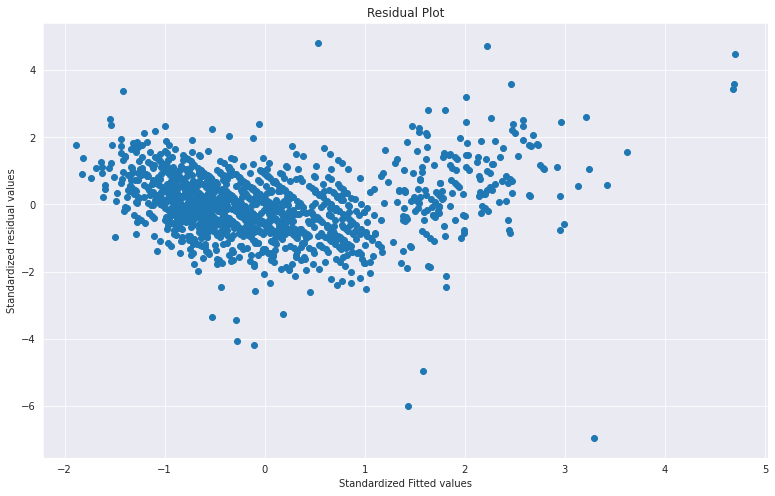

In [ ]:
plt.figure(figsize=(13,8))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

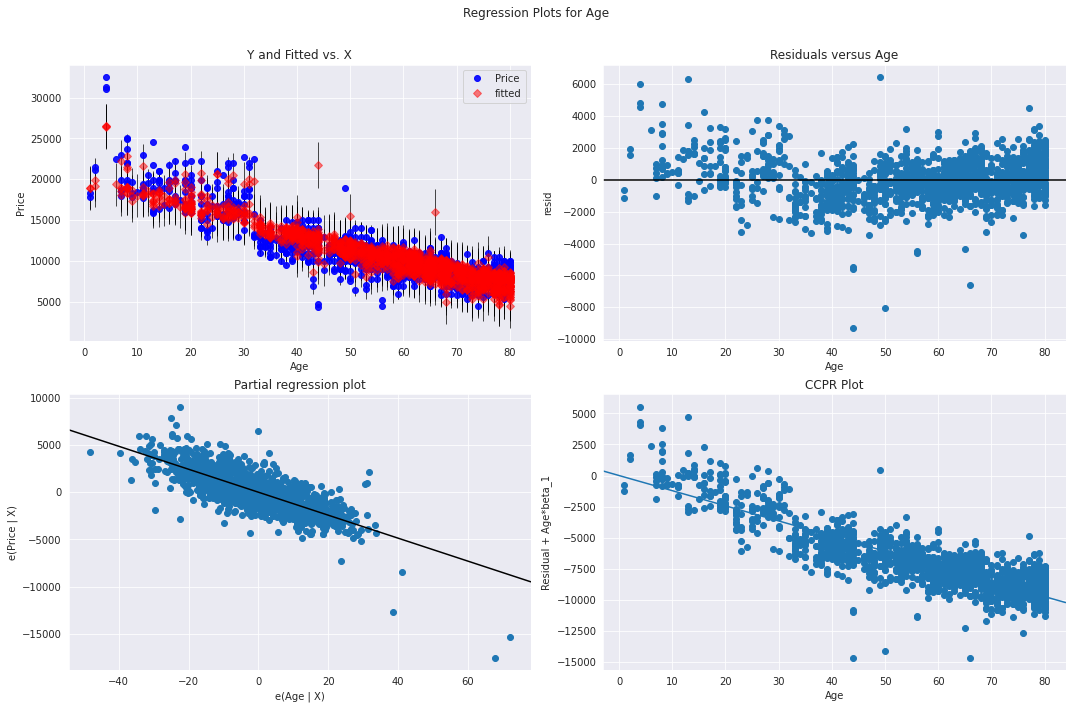

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

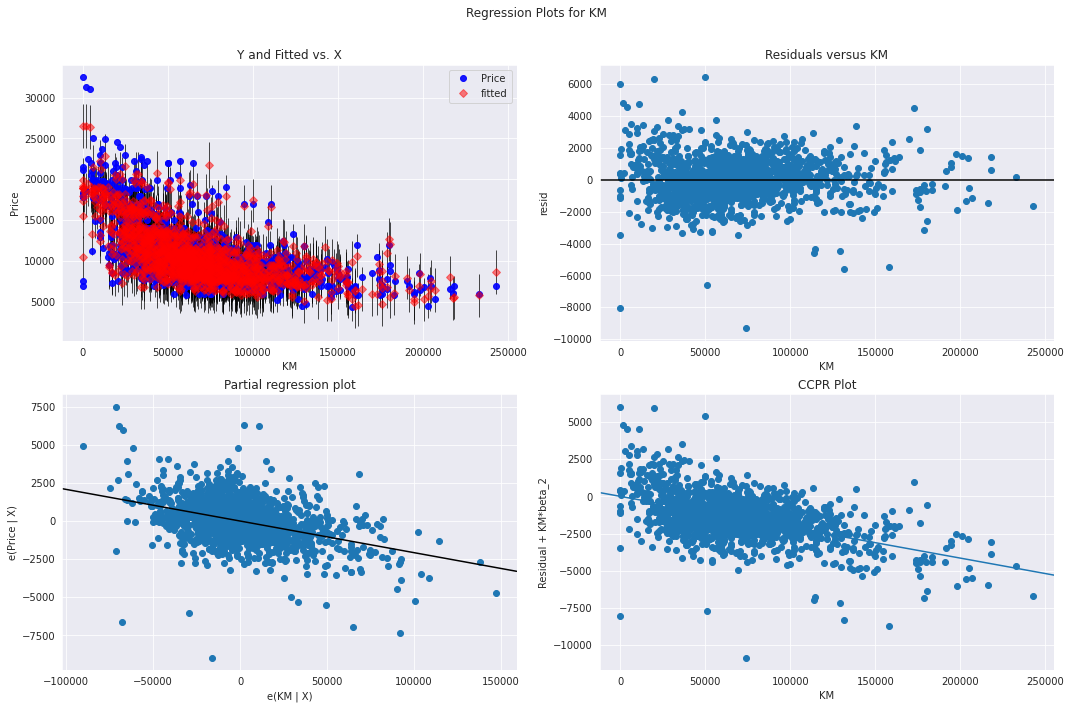

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

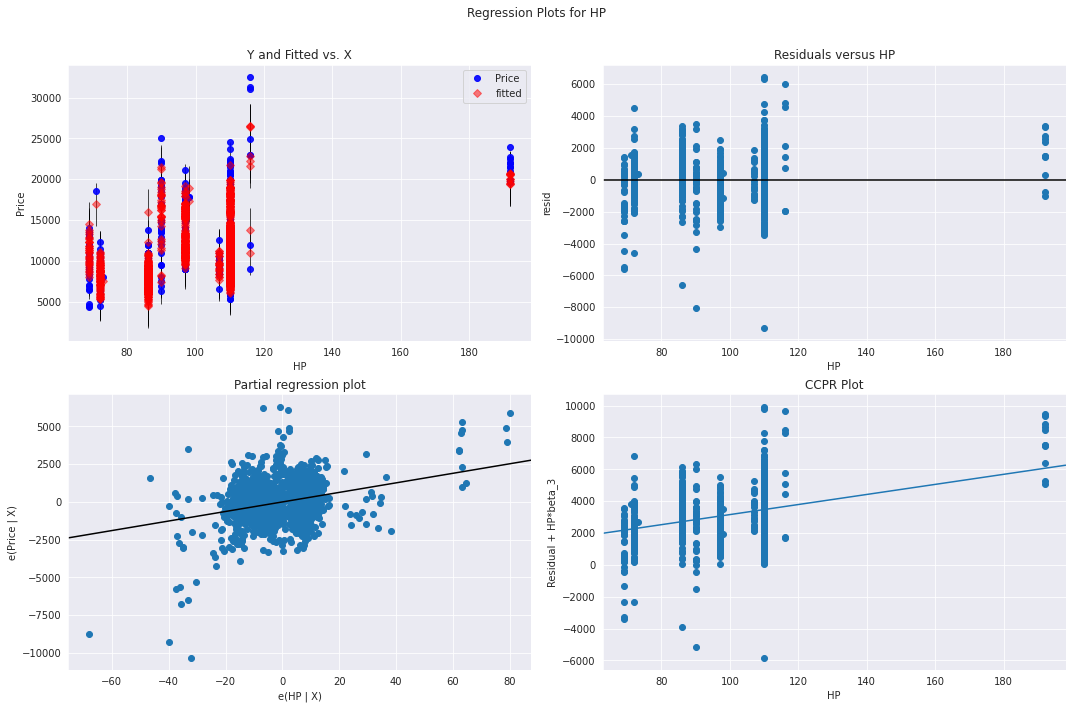

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

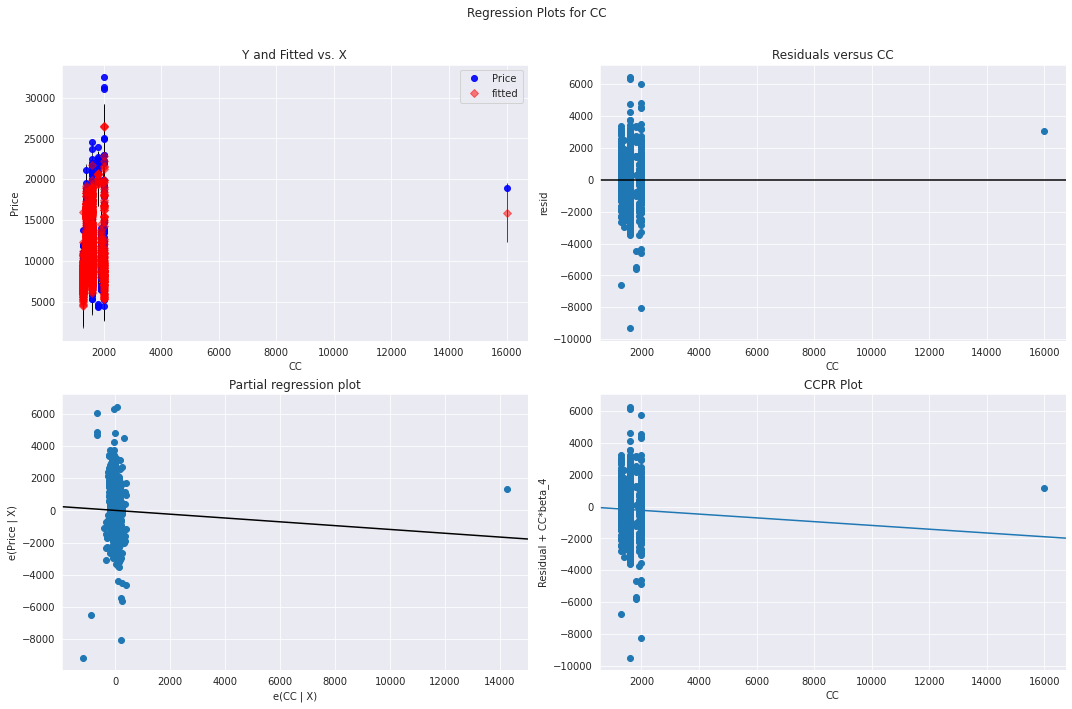

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

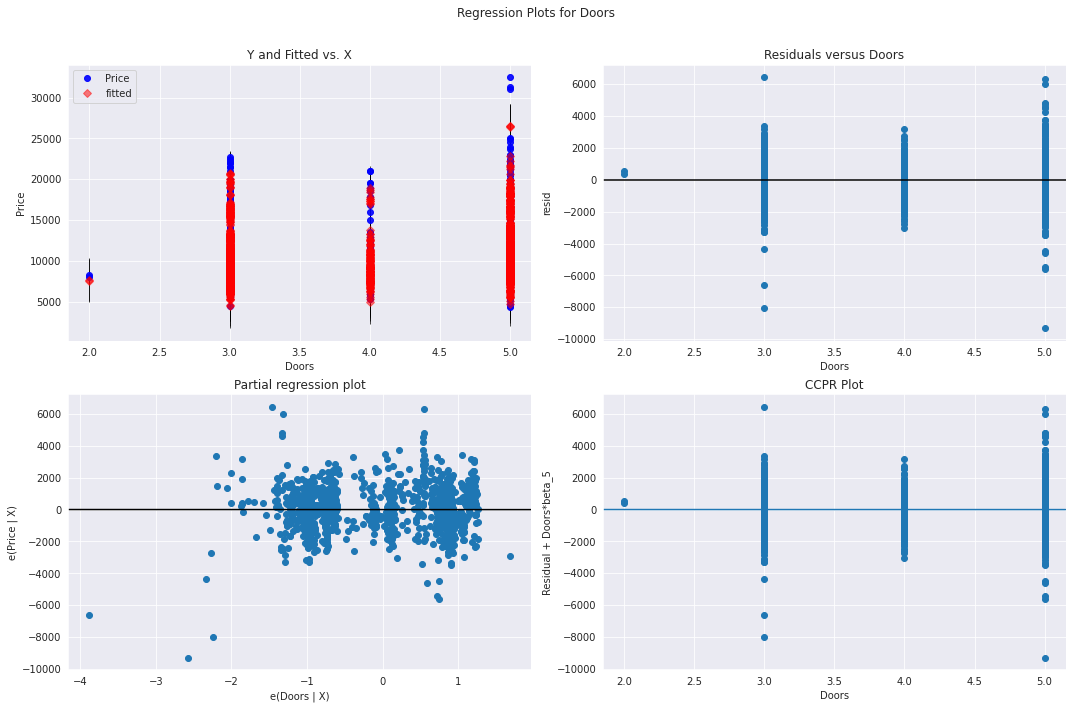

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

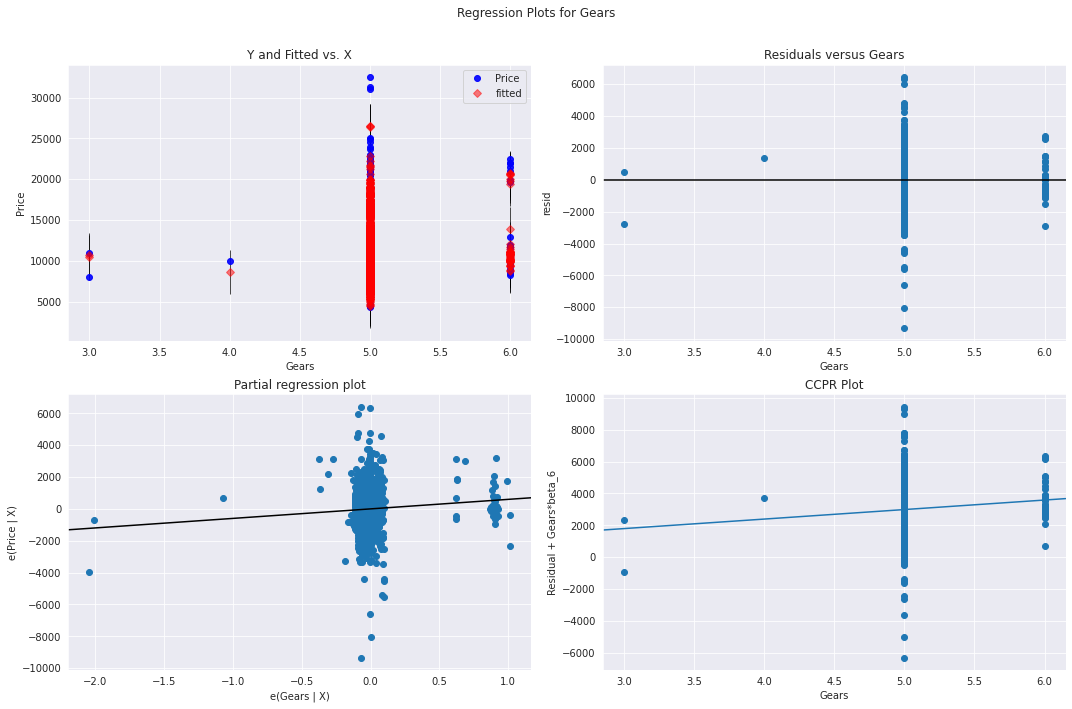

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

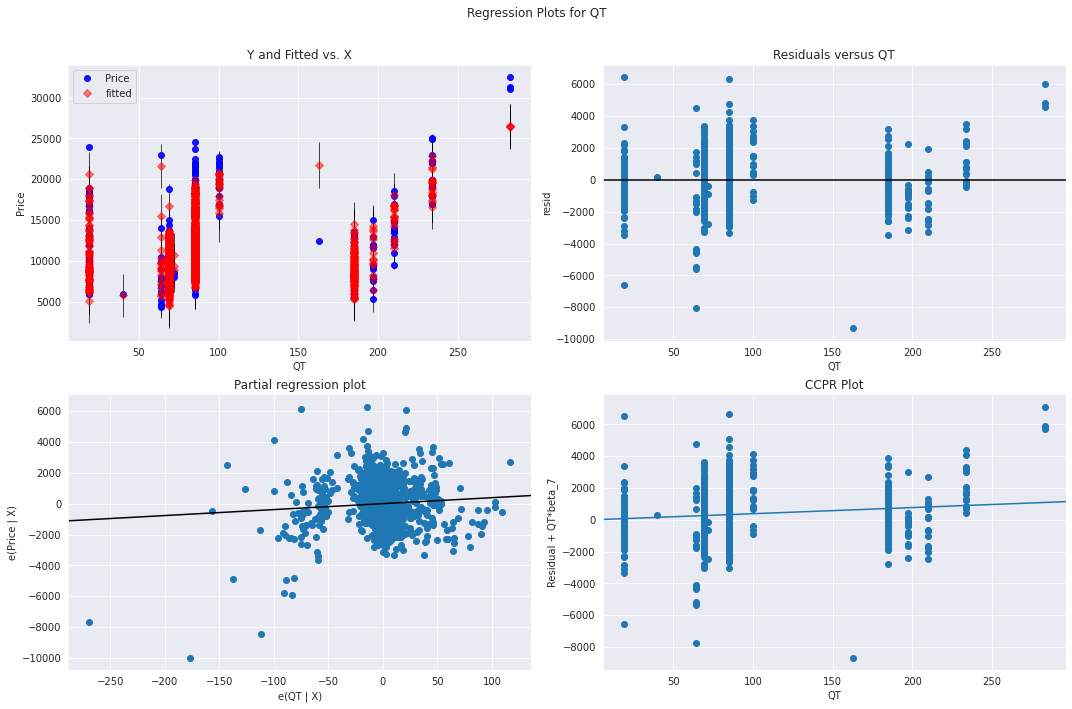

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

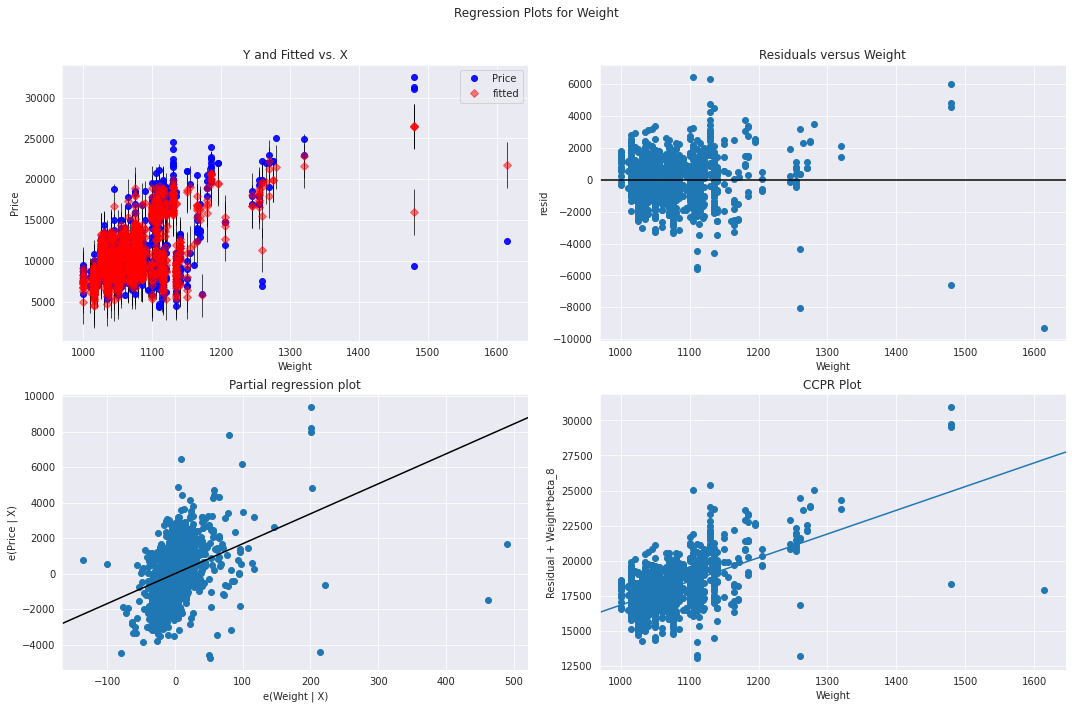

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

Model Deletion Diagnostics (Detecting Influencers/Outliers)

Cook’s Distance and Leverage Value

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

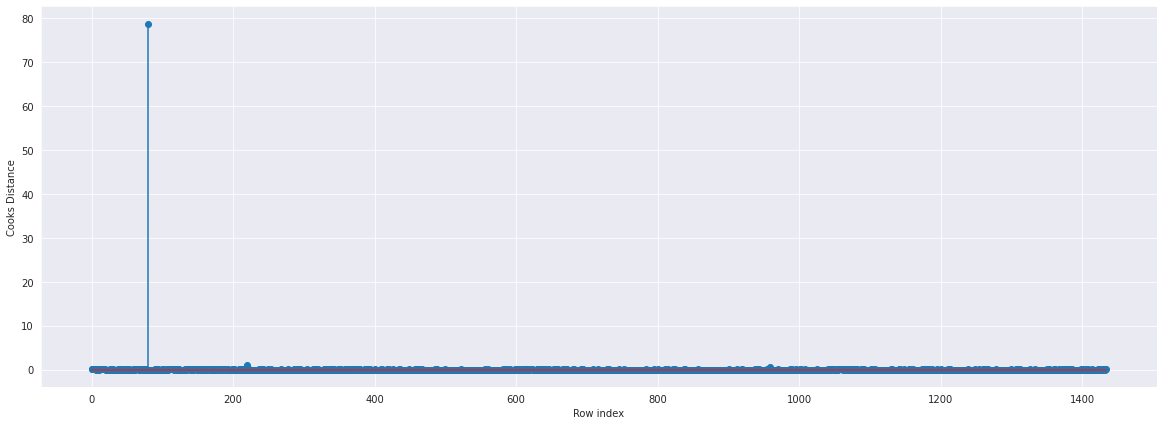

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyo4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582258927)

In [ ]:
k = toyo4.shape[1]
n = toyo4.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

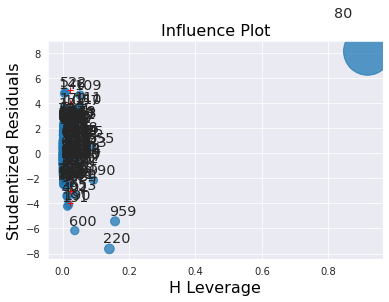

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-4,6)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [ ]:
toyo4[toyo4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyo5=toyo4.drop(toyo4.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
if np.max(c)>0.5:
  model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  toyo5
elif np.max(c)<1:
  final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
  final_model.rsquared,final_model.aic
  print('Model accuracy is improved to:',final_model.rsquared)

Model accuracy is improved to: 0.8882395145171205


In [ ]:
final_model.rsquared

0.8882395145171205

In [ ]:
toyo5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


Model Prediction

In [ ]:
predict_y=final_model.predict(toyo5)
predict_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64